In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re

In [3]:
df17 = pd.read_csv('df17.csv')
df16 = pd.read_csv('df16.csv')
df15 = pd.read_csv('df15.csv')
df14 = pd.read_csv('df14.csv')
df13 = pd.read_csv('df13.csv')
df12 = pd.read_csv('df12.csv')
df11 = pd.read_csv('df11.csv')

In [6]:
df.groupby('agent').size()

agent
N     355995
Y    1214792
dtype: int64

In [5]:
df=df17.append(df16).append(df15)

In [7]:
df['status']=df['status'].apply(lambda x: 1 if x=='CERTIFIED' else 0)
df['wageunit2']=df['wageunit'].apply(lambda x: 1 if x=='Year' else 12 if x=='Month' else 52 if x=='Week' else 26 if x=='Bi-Weekly' else 2080 if x=='Hour' else None)
df['wage2']=df['wage']*df['wageunit2']
df['agent']=df['agent'].apply(lambda x: 1 if x=='Y' else 0)
df=df[['status','daygap','naics','worker','soccode','wageunit2','wage2','agent']]

In [9]:
df.isnull().sum()
df=df.dropna(axis=0, subset=[['soccode', 'wage2']])
df=df.reset_index(drop=True)

In [10]:
df.isnull().sum()

status       0
daygap       0
naics        0
worker       0
soccode      0
wageunit2    0
wage2        0
agent        0
dtype: int64

## Random Forest: Just to get an idea of feature importance
#### Conclusion 1: worker and agent is not that important
#### Conclusion 2: importance order: wage>soccode>wageunit>daygap>naics

In [11]:
# remove all string after .
sep = '.'
df['soccode']=df['soccode'].apply(lambda x: x.split(sep, 1)[0])
# remove all non-numeric characters
df['soccode']=df['soccode'].apply(lambda x: re.sub("[^0-9]", "", x))
# change string to float for random forest 
df['soccode']=df['soccode'].apply(lambda x: float(x.replace('-','.')) if len(x)!=0 else None)
# remove Null results
df=df.dropna(axis=0, subset=['soccode'])

In [12]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

y=df['status']
X=df[['daygap','naics','worker','soccode','wageunit2','wage2','agent']]
y=y.values
X=X.as_matrix()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

X.shape, y_train.shape, y_test.shape

((1570769, 7), (1256615,), (314154,))

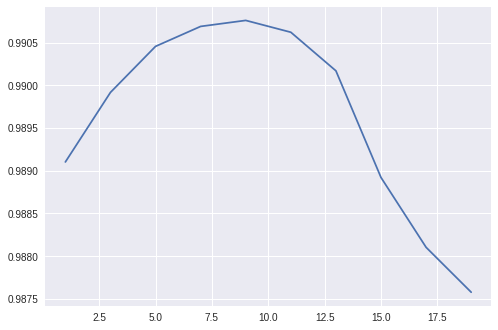

In [194]:
max_depths=range(1,21,2)

test_errors1 = []
test_errors2 = []
for max_depth in max_depths:
    est = RandomForestClassifier(max_depth=max_depth, random_state=0, class_weight="balanced").fit(X_train, y_train)
    y_pred = est.predict(X_test)
    #test_errors1.append(metrics.accuracy_score(y_test, y_pred))
    test_errors2.append(metrics.recall_score(y_test, y_pred))

#plt.plot(max_depths, test_errors1, label='Accuracy')
plt.plot(max_depths, test_errors2, label='Precision')

In [192]:
range(1,21,2)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [180]:
range(1,11,2)

[1, 3, 5, 7, 9]

In [191]:
indices = np.random.permutation(xrange(len(y)))
X_random_order, y_random_order = X[indices], y[indices]

est = RandomForestClassifier(class_weight="balanced")
gs = model_selection.GridSearchCV(
    est,
    {"max_depth": range(1,21,2)},
    cv=5,  # 5-fold cross validation
    #n_jobs=2,  # run each hyperparameter in one of two parallel jobs
    scoring='recall'
)
gs.fit(X_random_order, y_random_order)
print gs.best_params_

{'max_depth': 19}


In [ ]:
max_depths = range(1, 10)



In [165]:
y=df['status']
X=df[['daygap','naics','worker','soccode','wageunit2','wage2','agent']]
y=y.values
X=X.as_matrix()

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [166]:
print(clf.feature_importances_)

[ 0.04582395  0.08261935  0.00557155  0.23517049  0.12019066  0.48530471
  0.02531928]
